In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [7]:
csv_in = 'varied.csv'

In [8]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=0, header=0)
print(df.shape)
print(df.info())
print(df.head())

(1500, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      1500 non-null   float64
 1   x1      1500 non-null   float64
dtypes: float64(2)
memory usage: 23.6 KB
None
     x0    x1
0 -0.48  1.03
1 -0.77  0.85
2 -1.48 -1.91
3 -0.15 -0.14
4  0.41  0.54


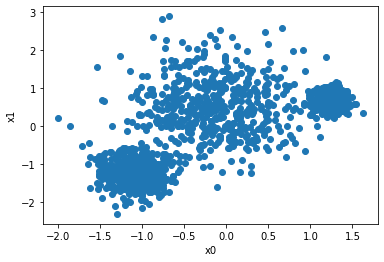

In [9]:
plt.scatter(df['x0'], df['x1'])
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

D:\PROGRAM_FILES\miniconda3\envs\ds2021\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


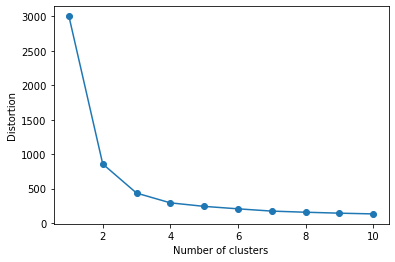

In [11]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(df)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Answer 1: Yes, 3 is a appropriate number of clusters

In [13]:
n_cls = 3
km = KMeans(n_clusters=n_cls, random_state=7)
cls = km.fit_predict(df)

In [14]:
print(cls)
print(pd.Series(cls).value_counts())

[2 2 0 ... 1 1 1]
1    566
0    538
2    396
dtype: int64


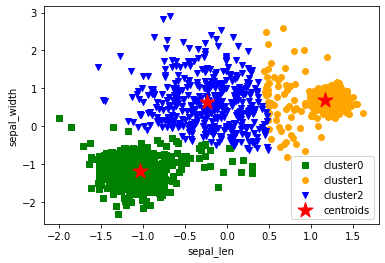

In [19]:
colors = ['green', 'orange', 'blue']
markers = ['s', 'o', 'v']
for i in range(n_cls):
    df_cls = df[ cls==i ]
    plt.scatter(df_cls['x0'], df_cls['x1'],
                c=colors[i], marker=markers[i],
                label='cluster{}'.format(i))
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*', c='red',
            label='centroids')
plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.show()

Answer 2: The graph above

In [20]:
n_cls = 4
km = KMeans(n_clusters=n_cls, random_state=7)
cls = km.fit_predict(df)

In [21]:
print(cls)
print(pd.Series(cls).value_counts())

[3 3 1 ... 0 0 0]
0    539
1    516
2    248
3    197
dtype: int64


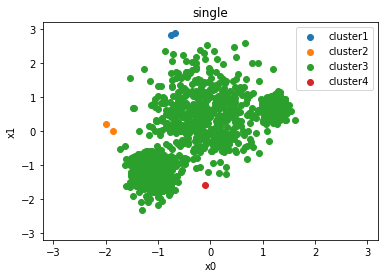

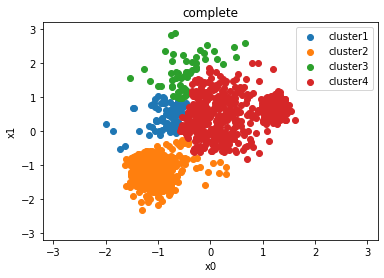

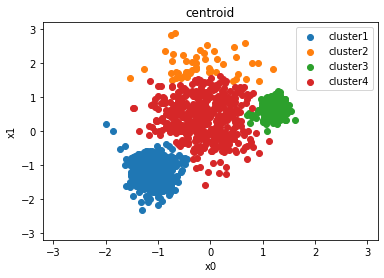

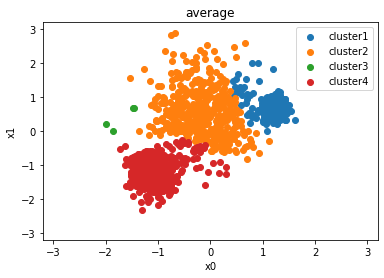

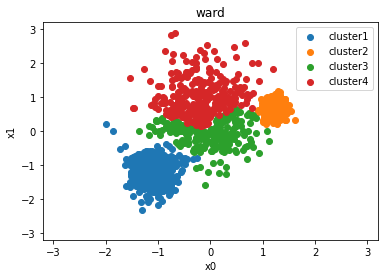

In [27]:
n_clusters = 4
for lin in ['single', 'complete', 'centroid', 'average', 'ward']:
    Z = linkage(df, method=lin, metric='euclidean')
    cls = fcluster(Z, n_clusters, criterion='maxclust')
    for i in range(1, n_clusters+1):
        df_cls = df[ cls==i ]
        plt.title(lin)
        plt.scatter(df_cls['x0'], df_cls['x1'],
                    label='cluster{}'.format(i))
    plt.xlim(-3.2, 3.2)
    plt.ylim(-3.2, 3.2)
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.legend()
    plt.show()

Answer 3:
4 is not a good number of clusters.
Among the results, on the one done with ward is acceptabe to some extent. Other ones do not show good clustering at all.